In [14]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Fixed single Boston experiment for all dataset as points

In [2]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [4]:
repetitions = 10
Ns = np.arange(5, 1000, 200)
print('Total runs: %d' % (repetitions * len(Ns)))

Total runs: 50


In [5]:
def run_for_N(N = 50):
    """ Train a network with given h1 size and compute mean FT variance """
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 500, do_print = 'plot')

    # obtaining data points
    data = exp.get_inputs(50)

    # obtaining errors and bounds for data points
    rmean, rstd = exp.run(data, repetitions = 10000)

    return np.mean(rstd['experiment'])

  0%|          | 0/5 [00:00<?, ?it/s]

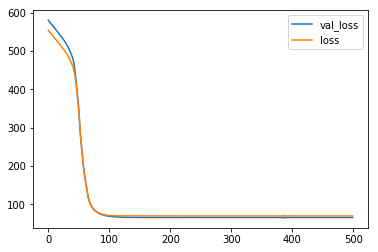

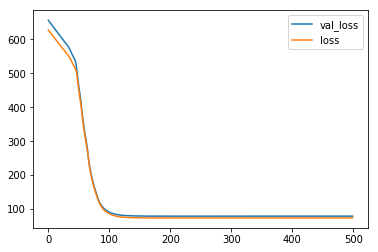

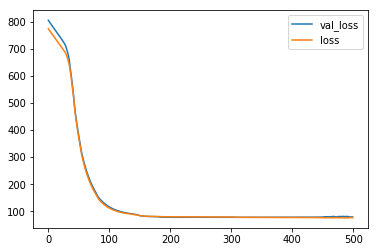

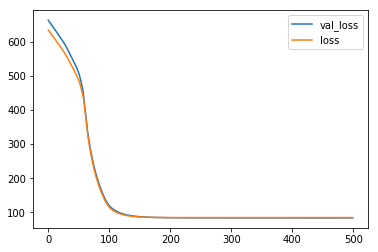

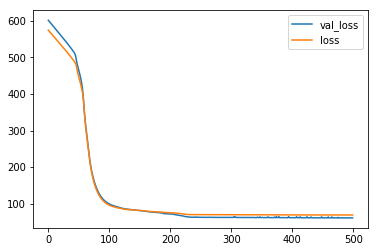

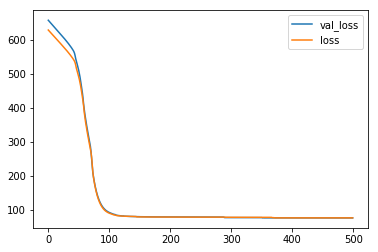

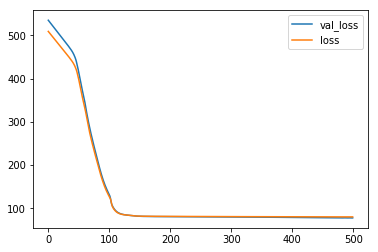

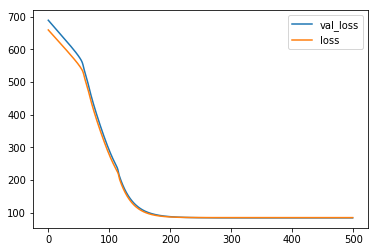

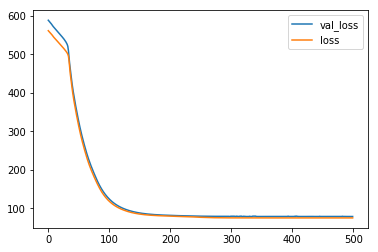

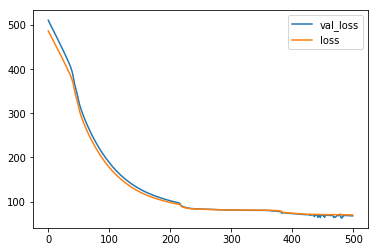

 20%|██        | 1/5 [01:14<04:59, 74.82s/it]

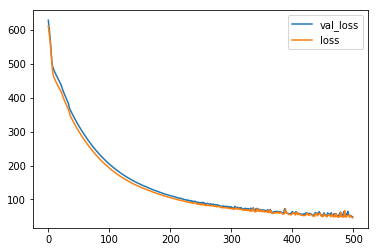

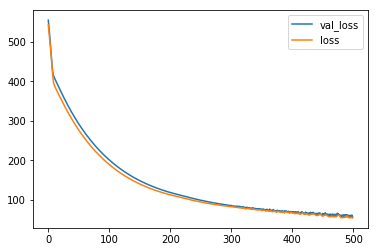

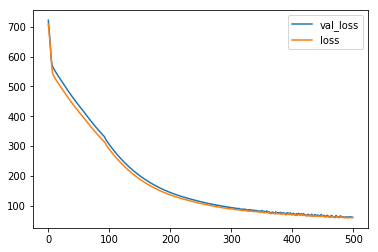

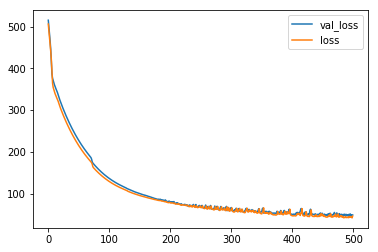

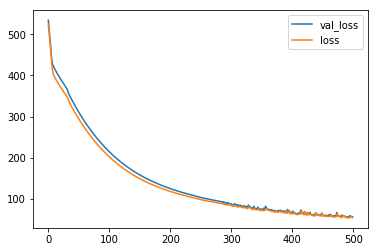

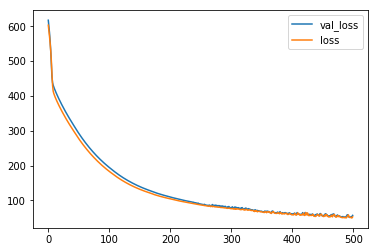

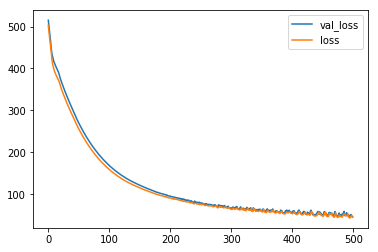

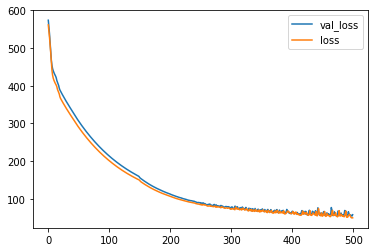

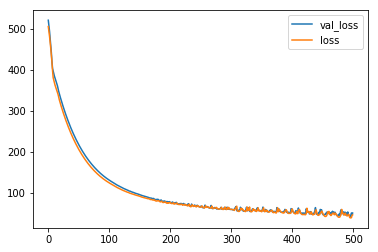

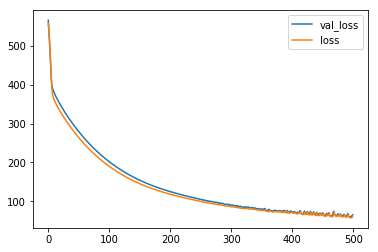

 40%|████      | 2/5 [04:40<05:42, 114.03s/it]

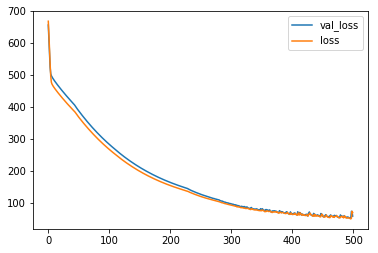

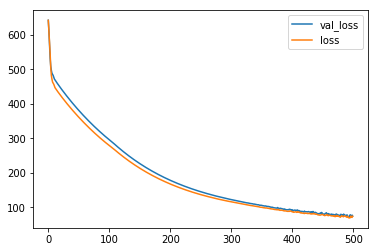

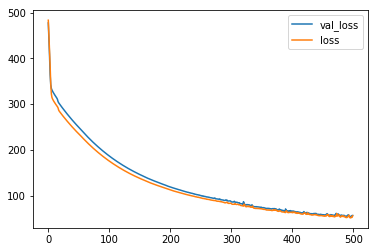

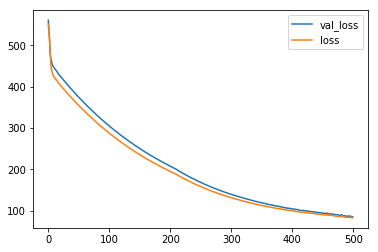

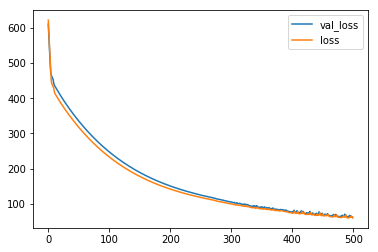

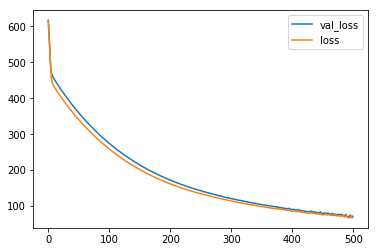

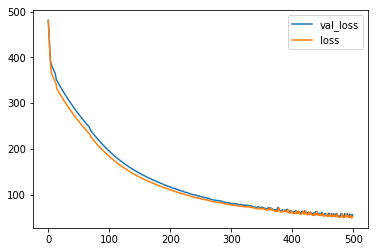

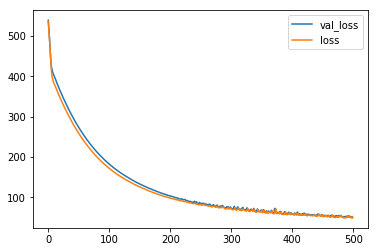

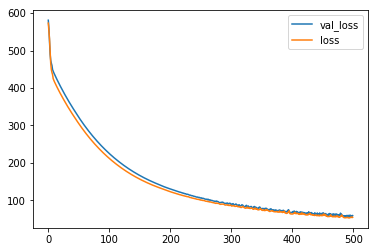

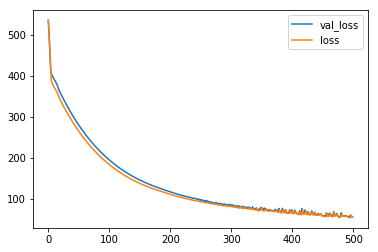

 60%|██████    | 3/5 [12:57<07:37, 228.89s/it]

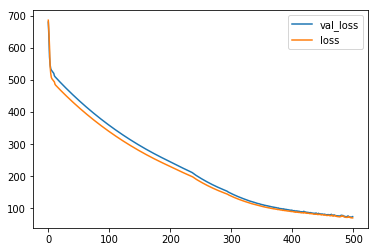

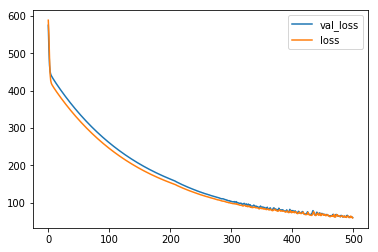

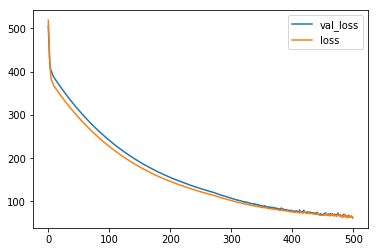

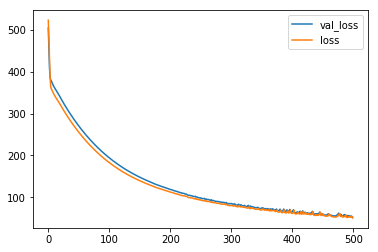

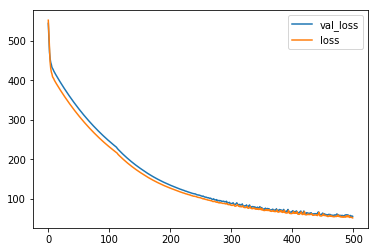

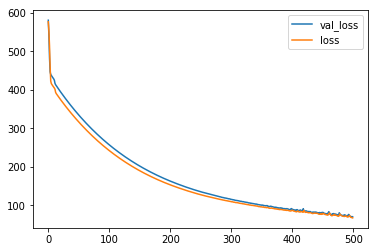

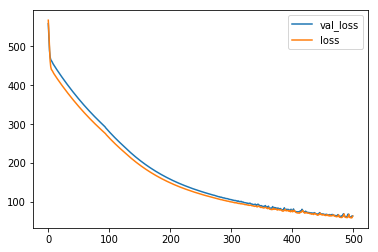

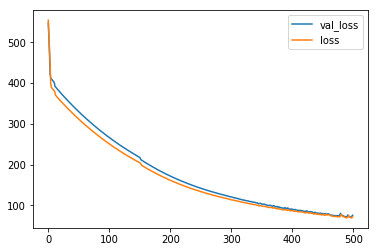

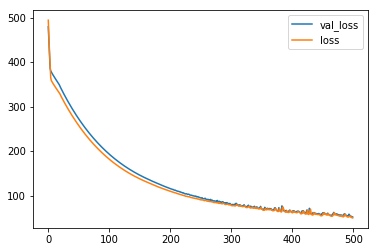

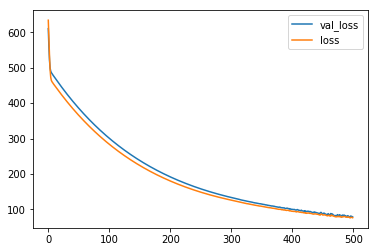

 80%|████████  | 4/5 [28:16<07:15, 435.91s/it]

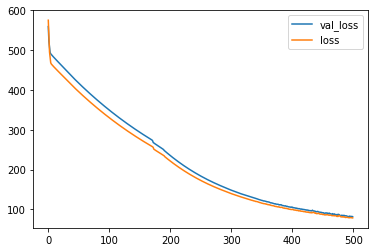

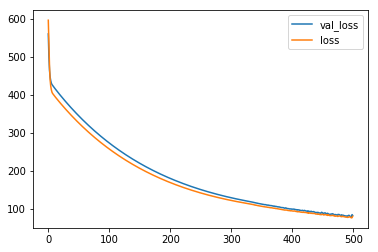

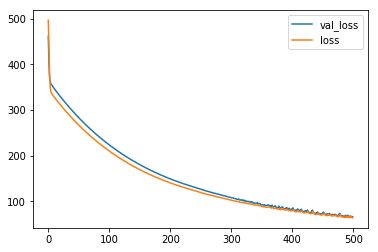

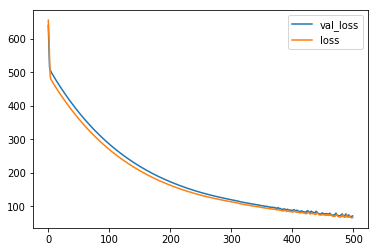

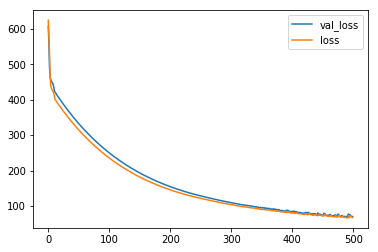

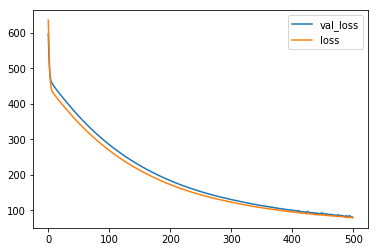

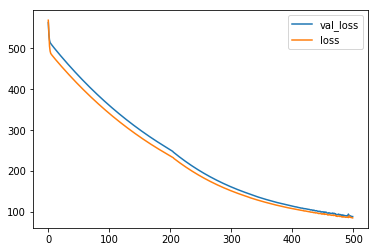

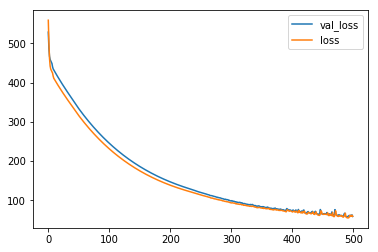

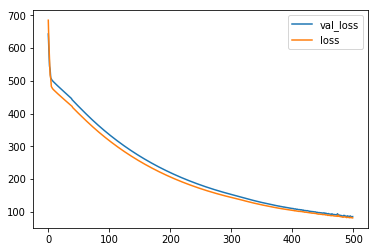

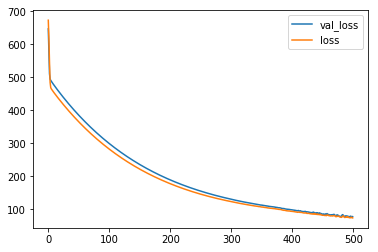

100%|██████████| 5/5 [53:18<00:00, 755.70s/it]


In [6]:
results = [[run_for_N(N) for _ in range(repetitions)] for N in tqdm(Ns)]

In [29]:
# fitting line to logarithmic plot
np.polyfit(Ns, np.log(mean), 1)

array([-0.00308991, -0.36546605])

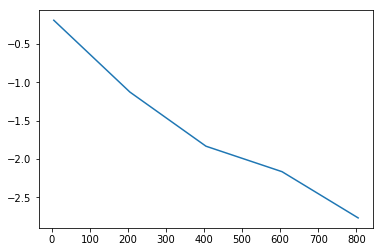

In [32]:
# logarithmic plot
plt.plot(Ns, np.log(mean))

In [ ]:
# The issue might be that networks do not converge to the same thing (no mean-field limi)

In [33]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

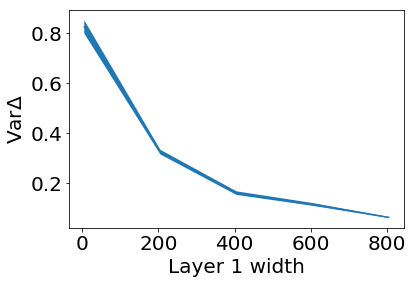

In [34]:
mean = np.mean(results, axis = 1)
std = np.std(results, axis = 1) / len(results[0])
plt.figure()
plt.xlabel('Layer 1 width')
plt.ylabel('Var$\Delta$')
plt.plot(Ns, mean)
plt.fill_between(Ns, mean - std, mean + std)
plt.savefig('figures/comparison_architecture_boston.eps', bbox_inches = 'tight')
plt.show()